In [1]:
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from phase_response import *


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surface_plots import *


# neuron params will determine the dynamics.

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0., 'f': 0., 'tau': 0.}


#RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
#     'a': 0.03, 'b': 5, 'c': -50, 'd': 100, 'e': 0., 'f': 0., 'tau': 0.}


ANIMATE = False

In [2]:

V_resolution, U_resolution = (200, 200)

I = 200

dt = 0.1


In [3]:
N_neurons = V_resolution * U_resolution

params = [RS for _ in range(N_neurons)]

params_df = pd.DataFrame(params)

batch = batchAQUA(params_df)

In [4]:
v_min = -80     #RS['v_r'] - 10
v_max = -20.      # RS['v_peak'] + 5
v_coords = np.linspace(v_min, v_max, V_resolution)

u_min = -200.
u_max = 200.
u_coords = np.linspace(u_min, u_max, U_resolution)

V, U = np.meshgrid(v_coords, u_coords)


W = np.zeros(np.shape(V))

Z = make_Z_sparse_least_squares(V, U, W, I, dt, batch)
print(np.shape(Z))


(200, 200)


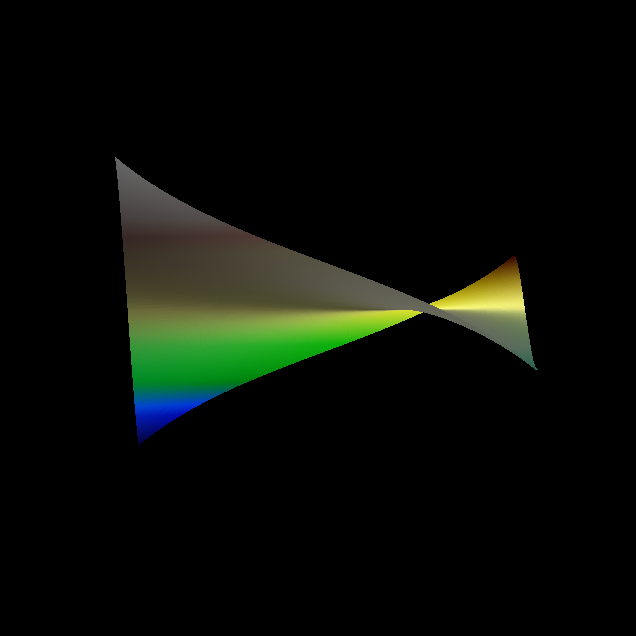

In [9]:

fig, ax = plt.subplots(1, 1, figsize = (8, 8), 
                       subplot_kw = dict(projection = '3d', facecolor = 'k'),
                        facecolor = 'k')

surf = plot_surface(ax, V, U, Z)
ax.view_init(elev = 0, azim = 270)
plt.show()



#### Animation

Here, the neuron has already been simulated.

So we have, time series X, injected current I

In [6]:
if ANIMATE:

    N_iter = 200
    I = np.full(shape = (N_neurons, N_iter), fill_value = np.linspace(50, 200, N_iter))     # increasing gradient

    ani = make_animation(V, U, W, I, batch, plot_surface, save = True)


#### Try Trajectory now


In [7]:
T = 0.5 #s

I_h = 0

v_min = -80         # RS['v_r'] - 10
v_max = 0.        # RS['v_peak'] + 5
v_coords = np.linspace(v_min, v_max, V_resolution)

u_min = -200.
u_max = 200.
u_coords = np.linspace(u_min, u_max, U_resolution)

V, U = np.meshgrid(v_coords, u_coords)

W = np.zeros(np.shape(V))

Z_surf = make_Z(V, U, W, I_h, dt, batch)


# plot the initial surface
fig, ax = plt.subplots(1, 1, figsize = (8, 8), 
                       subplot_kw = dict(projection = '3d', facecolor = 'k'),
                        facecolor = 'k')

surf = plot_surface(ax, V, U, Z_surf)
ax.view_init(elev = 30, azim = 300)

# plot the trajectory on top
x_start = np.array([-80, 100, 0])
fig, ax, new_ax = draw_trajectory(x_start, RS, T, dt, I_h, fig, ax)

NameError: name 'make_Z' is not defined

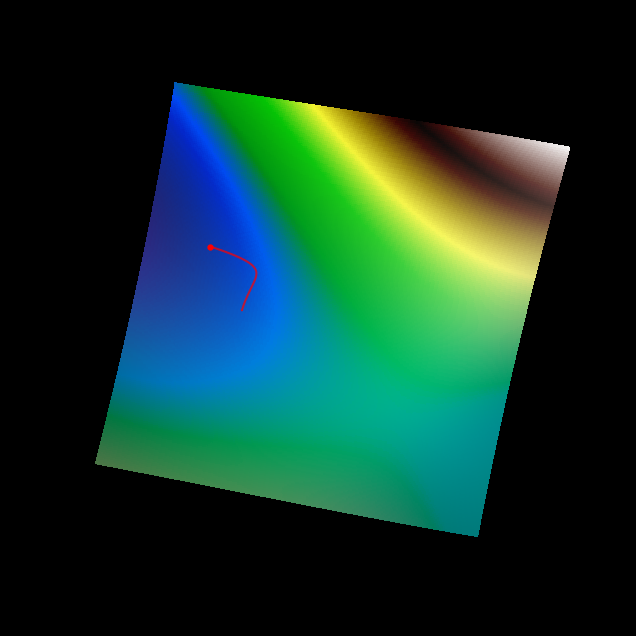

In [ ]:
ax.view_init(elev = 90, azim = 280)

fig